## Binary classifier with Keras


In [ ]:
#!pip install tensorflow

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
import pandas as pd

In [9]:
pwd

'/Users/sylvia/Desktop/IITR/M10-CV/Live_lectures'

In [8]:
data=pd.read_csv('data/data.csv')
data.head()

,x1,x2,label
0,2.6487,4.5192,1
1,1.5438,2.4443,1
2,1.8990,4.2409,1
3,2.4711,5.8097,1
4,3.3590,6.4423,1


In [10]:
X=data.drop(labels='label', axis=1)
 
y=data[['label']]

In [11]:
X.shape

(21, 2)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=42)

In [14]:
X_train.shape

(18, 2)

In [15]:
X_test.shape

(3, 2)

### Creating a neural n/w with one single neuron

If 1 neuron with 1 feature then 2 parameters to be estimated i.e. 1 weight and 1 bias inorder to minimize the loss function. If 1 neuron 2 features then 3 parameters to be estimated i.e. 2 weights and 1 bias.

#Simple Neural Network with Output Layer

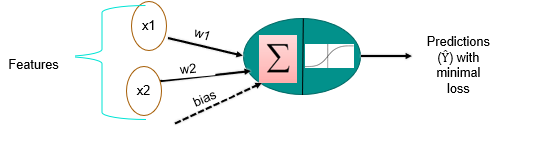

In [17]:
#Below dense layer with 1 neuron and 2 input features with sigmoid activation
# for binary classification
#model.add(Dense(1, input_dim = 2, activation='sigmoid'))

In real life u do not have 1 neuron but the concept of trainable parameters will be easy if we take just 1 neuron with 1 or 2 features.

In [18]:
model = Sequential()
model.add(Dense(1, input_dim = 2, activation='sigmoid'))

2023-08-30 09:25:10.089530: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [20]:
#compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

adam optimizer just an alternative to gradient descent which will find the minimum of cost function.

For each epoch a batch of dataset is going to be passed, here we have 10 epochs. There is only 1 batch here as everywhere we see 1/1 cz total samples in dataset are 21 while the default size of each batch is 32. Since the dataset is less than even the default size of batch hence we see only 1 batch.

### **Batch Size** - number of samples per gradient update.

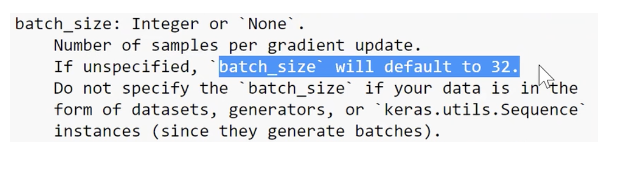

If u have anything greater than 32 then the data is going to be fed in batches. Since here total observations are only 18 hence everything went in 1 batch itself in 1 epoch.

In [24]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 5ms/step - loss: 3.8280 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 3.8230 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 3ms/step - loss: 3.8179 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 3.8129 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 3.8079 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 3.8029 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 3ms/step - loss: 3.7979 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 3.7930 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================] - 0s 2ms/step - loss: 3.7880 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================] - 0s 1ms/step - loss: 3.7831 - accuracy: 0.3333
Epoch 11/15
1/1 [======================

In [25]:
model.evaluate(X_test, y_test) #this will be test data

1/1 [==============================] - 0s 26ms/step - loss: 3.2717 - accuracy: 0.3333


[3.2716617584228516, 0.3333333432674408]

### Creating a multi-layered Neural Network

### Understand the need of multi-layered Neural Network

Since above 1 neuron is not the solution to all the data we have, at times we will have to create a stack of multiple neurons and layers of multiple such stacks so solve certain problems. We might not get a solution with just 1 neuron. There is no restriction in neural n/w, u r bound to deal with some complex data and u r bound to create stacks of multiple neurons in a layer and layers of multiple such stacks can be created.


In [26]:
import matplotlib.pyplot as plt

In [36]:
# input_dim=2 talks about the number of features. These features multiplied by neurons in the 
# 1st layer + number of neurons in 1st layer(bias terms) will give u trainable parameters in 
# 1st layer hence giving input dimension is imp.

U r predeciding everything that is beauty of neural n/w. U have not even executed u have just created a template over here. There is no data also here below. Without even passing the data u r deciding how many trainable parameters are over here in this model. 

More the trainable parameters more time u will need to execute. Sometimes u might not be able to do it on CPU u might need a GPU or a TPU like available on cloud based platforms like Google colab.

In [27]:
model2 = Sequential()
model2.add(Dense(50, input_dim=2, activation='relu')) #input_shape=(2,)
model2.add(Dense(20,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

Model summary-

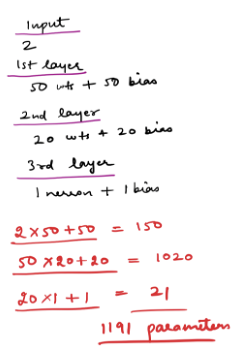

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                150       
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________


Above model summary is a plan. The execution happens later when we compile and train the model.

In [29]:
#compile

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 240ms/step - loss: 1.1266 - accuracy: 0.4444
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 1.0913 - accuracy: 0.4444
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0573 - accuracy: 0.4444
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 1.0243 - accuracy: 0.4444
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9924 - accuracy: 0.4444
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9618 - accuracy: 0.4444
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.9318 - accuracy: 0.4444
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9028 - accuracy: 0.4444
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.4444
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.4444


In [31]:
model2.evaluate(X_test, y_test) #this will be test data

1/1 [==============================] - 0s 91ms/step - loss: 0.8451 - accuracy: 0.3333


[0.8451018333435059, 0.3333333432674408]

In [ ]:
#Obtain the predictions

In [32]:
result=model2.predict(X_test) #inference with new data

1/1 [==============================] - 0s 82ms/step


In [33]:
#Predictions will be in the form of probabilities
result

array([[0.5776295 ],
       [0.63187087],
       [0.62736696]], dtype=float32)

In [34]:
print(result.round())

[[1.]
 [1.]
 [1.]]


In [35]:
result[2].round()

array([1.], dtype=float32)